# Sloupce (Series)

In [ ]:
import pandas as pd
import numpy as np
pd.Series?

Sloupec, neboli `Series`, je druhý základní datový typ v Pandas. 
Obsahuje sérii hodnot, jako seznam, ale navíc má jméno, datový typ a „index”, který jednotlivé hodnoty pojmenovává. 

## Vytvoření sloupce
Sloupec můžeme vytvořit jednoduše z pole

In [ ]:
names = ['Honza', 'Jirka', 'Petr', 'Julie']
pd.Series(names)

Nebo z numpy pole

In [ ]:
normal = pd.Series(np.random.normal(0, 1, 100))
normal.head()


A také z slovníku (dict)

In [ ]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
pd.Series(sports)

Pokud máme načtenou tabulku (Dataframe) můžeme se získat i z tabulky.

In [ ]:
actors = pd.read_csv('static/actors.csv', index_col=None)
birth_years = actors['birth']
birth_years

> #### Příklad:
> Máte k dispozici slovník obsahující jednotlivé americke státy:

In [ ]:
# Use this dictionary to map state names to two letter acronyms
states_dict = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

> Vytvořte z toho slovníku Serii

In [ ]:
# Řešení
states = pd.Series(states_dict, name="Staty")
states.head(10)

## Zjišťování dat o Serii

In [ ]:
actors = pd.read_csv('static/actors.csv', index_col=None)
birth_years = actors['birth']
actors

Ty serie:

In [ ]:
type(birth_years)

Každá serie si uchovává svoje jméno

In [ ]:
birth_years.name

Má vlastní definici indexu

In [ ]:
birth_years.index

A typ hodnot které uchovává

In [ ]:
birth_years.dtype

> #### Příklad
> Z jakého typu hodnoty a jaké indexy má Serie z předchozího příkladu?
> Zjistěte současné jméno Serie a nastavte jej na `states`

In [ ]:
# Řešení

### Statistické informace
Pokud Serie obsahuje čísla, dají se spočítat i základní statistické údaje.

In [ ]:
print('Součet: ', birth_years.sum())
print('Průměr: ', birth_years.mean())
print('Medián: ', birth_years.median())
print('Počet unikátních hodnot: ', birth_years.nunique())
print('Koeficient špičatosti: ', birth_years.kurtosis())

In [ ]:
birth_years.describe()

Nebo se vše dá získat souhrnný přehled pomocí metody `describe`

> #### Příklad:
> Ze soubory `gold_by_year.csv` načtěte cenu zlata. 
> Vypište základní statistické údaje.

In [ ]:
# Řešení
gold = pd.read_csv("static/gold_by_year.csv", index_col='Date')['Price']
type(gold)

## Operace
S informacemi ve sloupcích se dá počítat.
Základní aritmetické operace (jako sčítání či dělení) se sloupcem a skalární hodnotou (číslem, řetězcem, ...) provedou danou operaci nad každou hodnotou ve sloupci. Výsledek je nový sloupec:

In [ ]:
ages = 2018 - birth_years
ages

In [ ]:
century = birth_years + [0,1,2,3,4,5]
len(century)

To platí jak pro aritmetické operace (`+`, `-`, `*`, `/`, `//`, `%`, `**`), tak pro porovnávání:

In [ ]:
birth_years > 1940

In [ ]:
birth_years == 1940

Když sloupec nesečteme se skalární hodnotou (číslem) ale sekvencí, např. seznamem nebo dalším sloupcem, operace se provede na odpovídajících prvcích. 
Sloupec a druhá sekvence musí mít stejnou délku.

In [ ]:
actors['name'] + [' (1)', ' (2)', ' (3)', ' (4)', ' (5)', ' (6)']

Řetězcové operace se u řetězcových sloupců schovávají pod jmenným prostorem `str`:

In [ ]:
(actors['name']
    .str.upper()
    .str.replace('[AEIOU]', '*')
    .str.index('*'))

... a operace s daty a časy (*datetime*) najdeme pod `dt`.

> #### Příklad:
> Ze soubory `gold_by_year.csv` načtěte cenu zlata. 
> Tato cena je v dolarech, převeďte ji na koruny podle současného kurzu.

In [ ]:
# Řešení

## Intexy, řezy a masky
Ze slupce jdou vybírat prvky či pod sekvence podobně jako třeba ze seznamů:

In [ ]:
birth_years[2]

In [ ]:
birth_years[3:-2]

### Metoda `loc` a `iloc`
Mějme jednoduchou serii vytvořenou ze slovníku

In [ ]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

`iloc` se zeptám na hodntou třetí položky

In [ ]:
s.iloc[1:3]

`loc` se zeptam na hodnotu podle **indexu**

In [ ]:
s.loc['Golf':'Sumo']

> #### Příklad:
> Srovnejte výsledky předchozích dvou příkladů s vásledky následujích dvou zápisů z zkuste odvodit chování.

In [ ]:
s[3]

In [ ]:
s['Golf']

In [ ]:
gold = pd.read_csv("static/gold_by_year.csv", index_col='Date')['Price']
kurz = pd.read_csv('static/kurz_dolar_koruna.csv', index_col='Date')['USD']
gold_czk = gold.loc[1993:2017] * kurz
gold_czk.diff()

A navíc je lze vybírat pomocí sloupce typu `bool`, což vybere ty záznamy, u kterých je odpovídající hodnota *true*. Tak lze rychle vybrat hodnoty, které odpovídají nějaké podmínce:

In [ ]:
# Roky narození po roce 1940
birth_years[birth_years > 1940]

In [ ]:
mask = gold_czk.diff() < 0
gold_czk[mask]

In [ ]:
mask = [i % 2 == 0 for i in range(len(gold_czk))]
gold_czk[mask]

Protože Python neumožňuje předefinovat chování operátorů `and` a `or`, logické spojení operací se tradičně dělá přes bitové operátory `&` (a) a `|` (nebo). Ty mají ale neintuitivní prioritu, proto se jednotlivé výrazy hodí uzavřít do závorek:

In [ ]:
# Roky narození v daném rozmezí
starsi = birth_years > 1940
mladsi = birth_years < 1943
print(starsi)
print(mladsi)
print(starsi | mladsi)
birth_years[(birth_years > 1940) & (birth_years < 1943)]

> #### Příklad:
> Ze soubory `gold_by_year.csv` načtěte cenu zlata. 
> Ze souboru `kurz_dolar_koruna.csv` načtěte kurzu dolaru po letech
> Pro roky kdy máte dostupné všechny informace spočítejte cenu zlata v korunách.

In [ ]:
birth_years.where?

## Spojování serii
Pokud máme dvě serie, můžeme je pomocí metody `append` propojit za sebe, podobně jako pole.

In [ ]:
original_sports = pd.Series({'Archery': 'Bhutan',
                             'Golf': 'Scotland',
                             'Sumo': 'Japan',
                             'Taekwondo': 'South Korea'})
cricket_loving_countries = pd.Series(['Australia',
                                      'Barbados',
                                      'Pakistan',
                                      'England'], 
                                   index=['Cricket',
                                          'Cricket',
                                          'Cricket',
                                          'Cricket'])
all_countries = original_sports.append(cricket_loving_countries)

In [ ]:
original_sports

In [ ]:
cricket_loving_countries

In [ ]:
all_countries

In [ ]:
all_countries.loc['Cricket']

## Další metody
Sloupce mají zabudovanou celou řadu operací, od základních (např. `column.sum()`, která bývá rychlejší než vestavěná funkce `sum()`) po roztodivné statistické specialitky. Kompletní seznam hledejte v [dokumentaci](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html). Povědomí o operacích, které sloupce umožňují, je základní znalost datového analytika.

Uspořádání Serie podle hodnot

In [ ]:
by = birth_years.sort_values()

In [ ]:
all_countries.reset_index()

Pro rychlejší vyhledávání je vhodné mít setřízení indexy

In [ ]:
all_countries.sort_index()

Zvláště mocná je metoda `apply`, která nám dovoluje aplikovat jakoukoli funkci na všechny hodnoty sloupce:

In [ ]:
def foo(bunka):
    print(bunka)
    return list(reversed(bunka))

all_countries.apply?

In [ ]:
actors['name'].apply

In [ ]:
actors['alive'].apply({True: 'alive', False: 'deceased'}.get)

> #### Příklad:
> Ze soubory `obyvatel.csv` načtěte Serie která u měst v české republice udává kolik mají obyvatel. 
>
> *Pozor, po načtení zjistěte typ Serie a v případe nutnosti data upravte pomoci `str` a přetypute je pomocí `astype`*

In [1]:
import pandas as pd
# Řešení
obyvatel = pd.read_csv('static/obyvatel.csv', index_col='Mesto')['Obyvatel']
obyvatel.head()

Mesto
Abertamy             1 016
Adamov               4 552
Andělská Hora          356
Aš                   13245
Bakov nad Jizerou     5148
Name: Obyvatel, dtype: object

In [ ]:
import re

def convert(pocet):
    replaced = re.sub(r'\s', '', pocet)
    return int(replaced)


In [ ]:
%%timeit
multiple.apply(convert).head()

In [2]:
obyvatel = obyvatel.str.replace(r'\s', '').astype(int)

> 1. Zjistěte základní statistické údaje, najděte město s nejmenším a největším počtem obyvatel, kolik obyvatel žije ve městech

In [ ]:
obyvatel = obyvatel.sort_values()
obyvatel.iloc[:5]
obyvatel.iloc[-5:]

> 2. Vypište města která mají více než 100 000

In [5]:
# Řešení
obyvatel[obyvatel > 100000]

Mesto
Brno        379527
Liberec     103979
Olomouc     100494
Ostrava     290450
Plzeň       170936
Praha      1294513
Name: Obyvatel, dtype: int32

> 3. Zjistěte kolik procent obyvatel žije ve městech nad 100 000 obyvatel

In [3]:
# Řešení
nad = obyvatel[obyvatel > 100000].sum()
celkem = obyvatel.sum()
celkem, nad, (nad/celkem) * 100

(7337142, 2339899, 31.89115053245528)

In [4]:
import matplotlib
%matplotlib inline

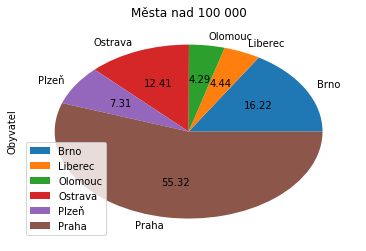

In [11]:
obyvatel[obyvatel > 100000].plot.pie(autopct='%.2f',legend=True, title="Města nad 100 000")

In [13]:
gold = pd.read_csv("static/gold_by_year.csv", index_col='Date')['Price']
kurz = pd.read_csv('static/kurz_dolar_koruna.csv', index_col='Date')['USD']
gold_czk = gold.loc[1993:2017] * kurz
gold_czk.head()

Date
1993     9591.790915
1994    11141.800020
1995    10053.600210
1996    10819.784910
1997    11258.197775
dtype: float64

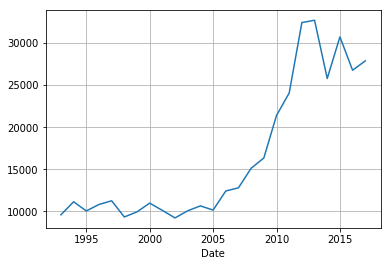

In [15]:
gold_czk.plot.line(grid=True)

AttributeError: Unknown property autopct

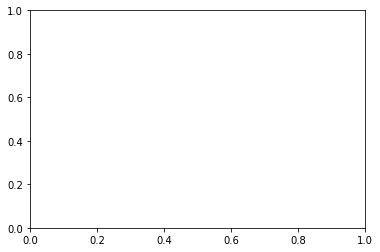

In [23]:
gold_czk.plot.bar()

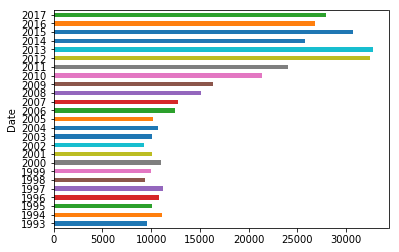

In [17]:
gold_czk.plot.barh()

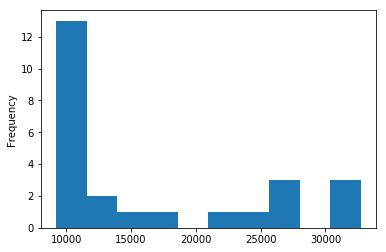

In [29]:
gold_czk.plot.hist()

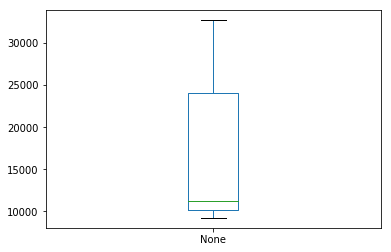

In [19]:
gold_czk.plot.box()

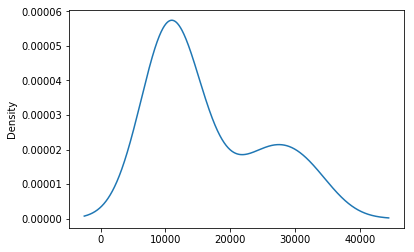

In [20]:
gold_czk.plot.kde()

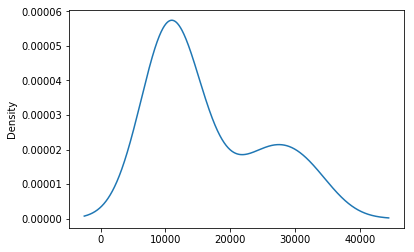

In [21]:
gold_czk.plot.density()

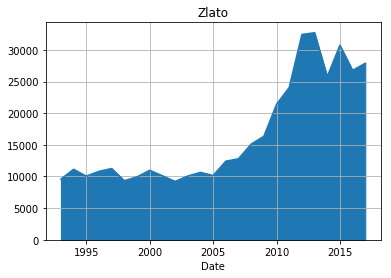

In [28]:
gold_czk.plot.area(grid=True, title="Zlato")